# **_0033 - Exploratory Data Analysis of Spotify Data_**

## **_Data Loading_**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

In [2]:
try:
    os.chdir("../../Workshop_002")
except FileNotFoundError:
    print("""
        FileNotFoundError - Puede que el directorio no exista o no estas ubicad@ en la ruta especificada.
        """)
os.chdir("..")
print(os.getcwd())

c:\Users\natym\Desktop


In [3]:
spotify_df = pd.read_csv("Workshop_002/data/spotify_dataset.csv")

In [4]:
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## **_Dataset Information_**

In [5]:
spotify_df.shape

(114000, 21)

In [6]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
spotify_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [8]:
spotify_df.describe(include="object")

,track_id,artists,album_name,track_name,track_genre
count,114000,113999,113999,113999,114000
unique,89741,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


## **_Data Cleaning_**

### **_Removal of `Unnamed` column_**

This column is removed beacase it doesn't have relevance in the dataset nature. 

In [9]:
spotify_df = spotify_df.drop(['Unnamed: 0'], axis=1)
spotify_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### **_Nulls review_**

In [10]:
spotify_df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Since there are nulls, we are going to verify which rows of the dataset are nulls. In this case, as we can see there is just one null row, and since the data that is null can not be imputed the best way to manage it is dropping the null row. 

In [11]:
spotify_df[spotify_df.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [12]:
spotify_df = spotify_df.dropna()

### **_Duplicated Values_**

In [13]:
print(f"Number  of duplicates: {spotify_df.duplicated().sum()}")

Number  of duplicates: 450


In this case, **450 duplicate** rows are found. Since these duplicates represent only a small portion of the dataset, they are removed to improve data quality.

In [14]:
spotify_df = spotify_df.drop_duplicates()


In [15]:
spotify_df.shape

(113549, 20)

##### **_Duplicates in `track_id`_**

The unique values are now checked to verify that there are no inconsistencies.

In [16]:
spotify_df.nunique()

track_id            89740
artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50696
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45652
time_signature          5
track_genre           114
dtype: int64

In the review of the values it can be seen that the number of values in `track_id` does not match the amount of data there (113549), which is not possible because each track `id` must be unique.

To ensure data integrity, rows with duplicate `track_id` values must be removed. Keeping only unique `track_id` entries guarantees that each track is distinct and properly identified in the dataset.

In [17]:
spotify_df = spotify_df.drop_duplicates(subset=['track_id'], keep='first')
spotify_df.shape

(89740, 20)

##### **_Duplicates in `track_name` and `artist` columns_**

In [18]:
songs_grouped = spotify_df.groupby(['track_name', 'artists'])

group_count = (songs_grouped.size().reset_index(name='count').sort_values(by='count', ascending=False))

repeated_songs = group_count.query('count > 1')
repeated_songs.head(10)

,track_name,artists,count
55084,Rockin' Around The Christmas Tree,Brenda Lee,45
37981,Little Saint Nick - 1991 Remix,The Beach Boys,41
55570,Run Rudolph Run,Chuck Berry,40
23998,Frosty The Snowman,Ella Fitzgerald,34
37090,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,32
42561,Mistletoe,Justin Bieber,31
59376,Sleigh Ride,Ella Fitzgerald,30
30348,I Saw Mommy Kissing Santa Claus,The Jackson 5,27
64803,The Christmas Song (Merry Christmas To You),Nat King Cole,26
56426,Santa Claus Is Coming To Town,The Jackson 5,26


In [19]:
repeated_songs.shape

(4657, 3)

To have a better approach of the evidenced duplicates there are some processes to do before treating them.

We consolidate sub-genres into broader categories to a better use of the data.

In [20]:
spotify_df["track_genre"].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [21]:
genre_mapping = {
      'Rock': ['alt-rock', 'alternative', 'grunge', 'hard-rock', 'psych-rock', 'rock', 'rock-n-roll','rockabilly', 'indie', 'garage', 'j-rock'],
      'Metal': ['black-metal', 'death-metal', 'heavy-metal', 'metal', 'metalcore', 'grindcore','industrial'],
      'Punk': ['punk', 'punk-rock', 'emo'],
      'Pop': ['pop', 'power-pop', 'synth-pop', 'k-pop', 'j-pop', 'cantopop', 'mandopop','indie-pop', 'british', 'swedish'],
      'Film/Show Music': ['pop-film', 'disney', 'show-tunes', 'anime'],
      'Electronic': ['electronic', 'electro', 'idm', 'trip-hop'],
      'Dance': ['dance', 'club', 'edm'],
      'House': ['house', 'deep-house', 'chicago-house', 'progressive-house', 'detroit-techno','j-dance'],
      'Techno': ['techno', 'minimal-techno'],
      'Bass Music': ['dubstep', 'drum-and-bass', 'dub', 'breakbeat', 'hardstyle'],
      'Hip-Hop': ['hip-hop', 'r-n-b'],
      'Reggae/Dancehall': ['reggae', 'dancehall', 'reggaeton'],
      'Jazz': ['jazz', 'groove'],
      'Blues': ['blues', 'bluegrass', 'honky-tonk'],
      'Soul/Funk': ['soul', 'funk', 'gospel'],
      'Country': ['country'],
      'Folk': ['folk', 'singer-songwriter'],
      'Latin': ['latin', 'latino', 'salsa', 'samba', 'pagode', 'sertanejo', 'brazil', 'mpb','tango', 'spanish', 'forro'],
      'World Music': ['afrobeat', 'indian', 'iranian', 'malay', 'turkish', 'french', 'german','world-music'],
      'Classical': ['classical', 'opera', 'piano'],
      'Instrumental': ['acoustic', 'guitar', 'new-age'],
      'Ambient/Chill': ['ambient', 'chill', 'sleep', 'study'],
      'Mood': ['happy', 'sad', 'romance'],
      'Children': ['children', 'kids'],'Comedy/Novelty': ['comedy'],'Disco': ['disco'],'Goth': ['goth'],'Ska': ['ska'],'Party': ['party'],'J-Idol': ['j-idol']
}

In [22]:
genre_category_mapping = {genre: category for category, genres in genre_mapping.items() for genre in genres}

spotify_df["track_genre"] = spotify_df["track_genre"].map(genre_category_mapping)

spotify_df["track_genre"].unique()

array(['Instrumental', 'World Music', 'Rock', 'Ambient/Chill',
       'Film/Show Music', 'Metal', 'Blues', 'Latin', 'Bass Music', 'Pop',
       'House', 'Children', 'Classical', 'Dance', 'Comedy/Novelty',
       'Country', 'Reggae/Dancehall', 'Disco', 'Electronic', 'Punk',
       'Folk', 'Soul/Funk', 'Goth', 'Jazz', 'Mood', nan, 'Hip-Hop',
       'J-Idol', 'Techno', 'Party', 'Ska'], dtype=object)

Now that the genres are estandarized we can proceed handling the duplicates.

A list of columns is created in which the track_id and album_name are not taken into account because it is possible that the same song appears in several albums or has unique identifiers, but that does not mean that it is a different version of the song. And based on this, the duplicates that appear in this list are eliminated.

In [50]:
subset_cols = [col for col in spotify_df.columns if col not in ["track_id", "album_name"]]

spotify_df = spotify_df.drop_duplicates(subset=subset_cols, keep="first")

spotify_df.shape

(81343, 14)

Finally, the songs are grouped by `track_id` and `artist`, and from each group the most popular song index is selected. Then the original DataFrame is filtered only with these values to leave the most popular version of the song.

In [25]:
idx = spotify_df.groupby(['track_name', 'artists'])['popularity'].idxmax()
spotify_df = spotify_df.loc[idx].reset_index(drop=True)

In [26]:
spotify_df.shape

(81343, 20)

### **_Song Duration (miliseconds to minutes)_**

The change from milliseconds to minutes in the “duration_ms” column is made because this way the interpretation of the duration of the songs is more intuitive.

In [27]:
print(spotify_df["duration_ms"])

0        178533
1        151680
2         84305
3         86675
4        289133
          ...  
81338    225785
81339    202440
81340    144533
81341    228000
81342    185666
Name: duration_ms, Length: 81343, dtype: int64


In [28]:
spotify_df['duration_min'] = spotify_df['duration_ms'] / 60000

In [29]:
spotify_df = spotify_df.drop('duration_ms', axis=1)

spotify_df = spotify_df.reindex(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
 'duration_min', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
 'tempo', 'time_signature', 'track_genre'], axis=1)

spotify_df.head()

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,2.975550,True,0.823,0.6120,1,-7.767,1,0.2480,0.168,0.00000,0.1090,0.6880,142.959,4,World Music
1,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,2.528000,False,0.615,0.3750,0,-10.362,0,0.0319,0.482,0.00000,0.1110,0.9220,110.720,4,Rock
2,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",32,1.405083,False,0.553,0.8120,3,-5.542,1,0.0558,0.132,0.00001,0.0794,0.8710,118.368,4,Children
3,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,1.444583,False,0.664,0.6110,3,-8.687,1,0.0886,0.120,0.00000,0.0408,0.7580,118.443,4,Children
4,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,4.818883,False,0.111,0.0568,10,-28.053,1,0.0551,0.990,0.69700,0.1100,0.0395,169.401,1,Ambient/Chill


### **_Numeric values to Categorical values_**

**_Popularity_**

In [30]:
spotify_df['popularity_cat'] = pd.cut(spotify_df['popularity'], 
                               bins=[0, 30, 60, 80, 100],
                               labels=['Low', 'Medium', 'High', 'Very High'])

**_Danceability_**

In [31]:
spotify_df['danceability_cat'] = pd.cut(spotify_df['danceability'], 
                                 bins=[0, 0.3, 0.6, 1],
                                 labels=['Low', 'Medium', 'High'])

**_Energy_**

In [32]:
spotify_df['energy_cat'] = pd.cut(spotify_df['energy'], 
                           bins=[0, 0.3, 0.7, 1],
                           labels=['Low', 'Medium', 'High'])

**_Duration_**

In [33]:
spotify_df['duration_cat'] = pd.cut(spotify_df['duration_min'],
                             bins=[0, 2, 3.5, 5, 10, 20],
                             labels=['Very Short', 'Short', 'Average', 'Long', 'Very Long'])

**_Valence_**

In [34]:
spotify_df['valence_cat'] = pd.cut(spotify_df['valence'],
                            bins=[0, 0.2, 0.4, 0.6, 0.8, 1],
                            labels=['Very Sad','Sad','Neutral','Happy','Very Happy'])

**_Loudness and Liveness_**

In [35]:
spotify_df['is_loud'] = spotify_df['loudness'] > -5
spotify_df['is_live'] = spotify_df['liveness'] > 0.8

### **_Column Removal_**

In this part we eliminate the numerical columns that are not going to be used in the future analysis.

In [ ]:
spotify_df = spotify_df.drop(['popularity', 'danceability', 'energy', 'valence', 'loudness', 'liveness','key', 
                              'mode', 'time_signature', 'tempo', 'speechiness', 'acousticness', 'instrumentalness'], axis=1)

In [38]:
spotify_df.head()

,track_id,artists,album_name,track_name,duration_min,explicit,track_genre,popularity_cat,danceability_cat,energy_cat,duration_cat,valence_cat,is_loud,is_live
0,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,2.975550,True,World Music,Medium,High,Medium,Short,Happy,False,False
1,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",2.528000,False,Rock,Medium,High,Medium,Short,Very Happy,False,False
2,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",1.405083,False,Children,Medium,Medium,High,Very Short,Very Happy,False,False
3,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",1.444583,False,Children,Low,High,Medium,Very Short,Happy,False,False
4,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",4.818883,False,Ambient/Chill,NaN,Low,Low,Average,Very Sad,False,False


In [41]:
spotify_df.shape

(81343, 14)

## **Analysis**

#### **_Characteristics Distribution_**

🏷️ **_Popularity Distribution_**

Most of the songs are of average popularity, which is typical of large music catalogs where few songs are big hits.

🪩 **_Danceability Distribution_**

A large part of the catalog is relatively danceable, suggesting that there are many songs intended to be enjoyed with rhythm.

✨ **_Energy Distribution_**

The dataset has a tendency towards high-energy songs, which may be related to pop, electronic or rock music.

🎵 **_Duration Distribution_**

It matches the usual commercial song structure (~2-4 minutes).

🎶 **_Valence Distribution_**

There is emotional variety in the songs, but songs that convey a more serious or neutral energy are slightly predominant.

🎵 **_Explicit Distribution_**

The catalog is mostly suitable for all audiences, but includes a fair amount of explicit content.

📣 **_Loudness Distribution_**

There is variety in the volume dynamics, although the more moderate songs in sound intensity predominate.

🎤 **_Liveness Distribution_**

The dataset is mainly composed of studio recordings.

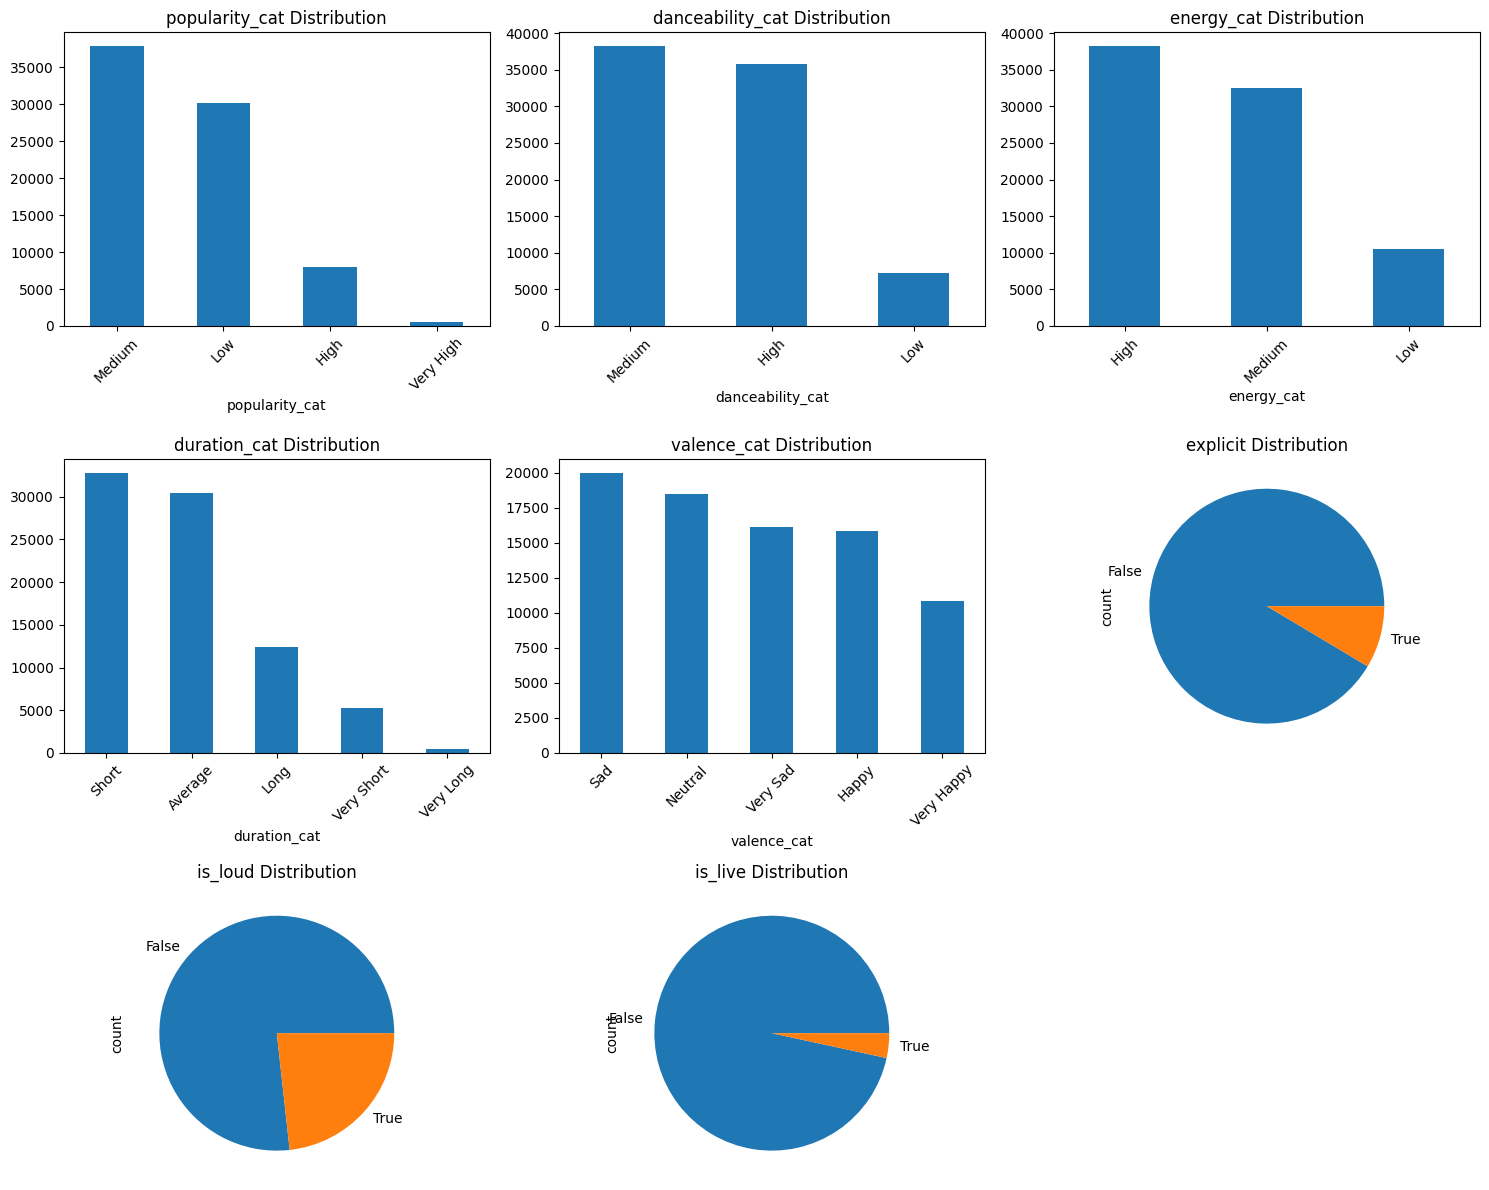

In [51]:
cat_cols = ['popularity_cat', 'danceability_cat', 'energy_cat', 
            'duration_cat', 'valence_cat', 'explicit', 'is_loud', 'is_live']

plt.figure(figsize=(15, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    spotify_df[col].value_counts().plot(kind='bar' if spotify_df[col].nunique() > 2 else 'pie')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **_Genres with the highest % of High Danceability & Energy Songs_**

- Genres traditionally associated with dancefloor or celebration music (Party, Disco, House, Techno) dominate this ranking.

- Even more traditional genres such as Latin or fusion such as Reggae/Dancehall maintain a good proportion, but not as high as electronic.

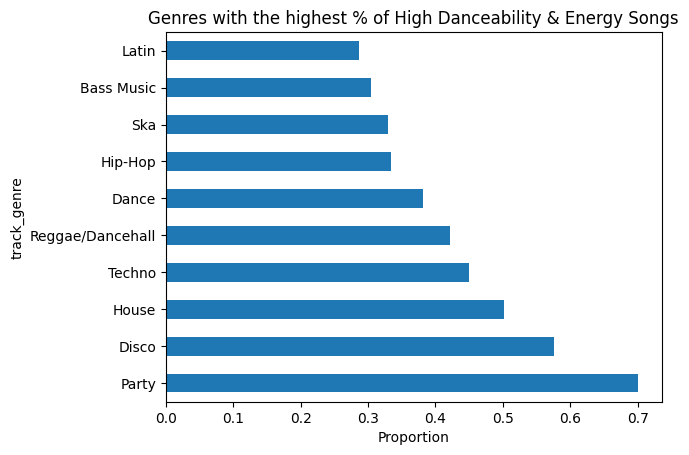

In [53]:
genre_dance_energy = spotify_df.groupby('track_genre').apply(
    lambda x: ((x['danceability_cat'] == 'High') & 
               (x['energy_cat'] == 'High')).mean()
).sort_values(ascending=False).head(10)

genre_dance_energy.plot(kind='barh')
plt.title('Genres with the highest % of High Danceability & Energy Songs')
plt.xlabel('Proportion')
plt.show()

#### **_Genres with the Longest Average Duration (min)_**

- The longest duration tends to coincide with genres:

    -  Designed for the dance floor (Techno, House).

    - Instrumental or narrative (Jazz, Folk, World Music).

- Techno stands out a lot, almost 2 minutes above the second place.

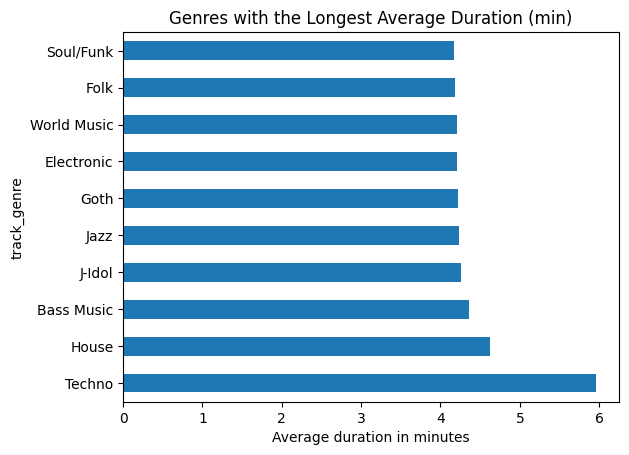

In [54]:
duration_by_genre = spotify_df.groupby('track_genre')['duration_min'].agg(
    ['mean', 'count']).sort_values('mean', ascending=False)

duration_by_genre = duration_by_genre[duration_by_genre['count'] > 10]

duration_by_genre['mean'].head(10).plot(kind='barh')
plt.title('Genres with the Longest Average Duration (min)')
plt.xlabel('Average duration in minutes')
plt.show()

#### **_Key Relationships by Popularity Category_**

This graph shows how songs are distributed according to their duration in minutes (`duration_min`), differentiated by their popularity category (`popularity_cat`).

- All categories tend to concentrate on short durations (between 2 and 5 minutes), this is expected for most commercial songs.

- Songs of “Medium” popularity (probably the orange curve) have the highest peak density, i.e., the largest proportion of songs of this popularity are concentrated around ~3 minutes.

- The low popularity and high popularity categories seem to follow similar patterns, but it is noticeable that:

- Less popular songs are more spread out (there are some that extend into the extremes of duration, especially at longer durations).

- Medium and high popularity songs are heavily concentrated in short durations, reinforcing the idea that more popular songs tend to be shorter and more easily consumed.

- There is a small peak around 40 minutes, probably extended recordings, live albums, or podcasts, but these are not as common.

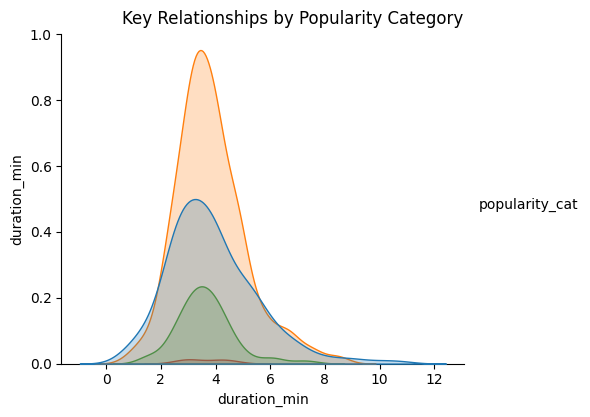

In [55]:
sns.pairplot(data=spotify_df.sample(1000), 
             vars=['duration_min'],
             hue='popularity_cat', 
             plot_kws={'alpha':0.6},
             height=4,
             aspect=1.2)
plt.suptitle('Key Relationships by Popularity Category', y=1.02)
plt.show()